In [16]:
import numpy as np 
import pandas as pd

In [17]:
df=pd.read_csv(r"D:\flight delay\archive (1)\flights_sample_2m.csv")

In [18]:
df.shape

(2000000, 32)

In [19]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2020-03-17,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1131,IAH,"Houston, TX",MSY,"New Orleans, LA",...,0.0,76.0,63.0,46.0,305.0,NaN,NaN,NaN,NaN,NaN
1,2019-11-03,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2650,LAX,"Los Angeles, CA",LAS,"Las Vegas, NV",...,0.0,70.0,54.0,44.0,236.0,NaN,NaN,NaN,NaN,NaN
2,2020-04-02,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3263,OMA,"Omaha, NE",STL,"St. Louis, MO",...,0.0,75.0,67.0,56.0,342.0,NaN,NaN,NaN,NaN,NaN
3,2022-09-03,Envoy Air,Envoy Air: MQ,MQ,20398,3936,ORD,"Chicago, IL",CID,"Cedar Rapids/Iowa City, IA",...,0.0,66.0,55.0,36.0,196.0,NaN,NaN,NaN,NaN,NaN
4,2021-05-04,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1614,LAS,"Las Vegas, NV",SLC,"Salt Lake City, UT",...,0.0,85.0,77.0,56.0,368.0,NaN,NaN,NaN,NaN,NaN


In [20]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     51430
DEP_DELAY                    51449
TAXI_OUT                     52281
WHEELS_OFF                   52281
WHEELS_ON                    53091
TAXI_IN                      53091
CRS_ARR_TIME                     0
ARR_TIME                     53091
ARR_DELAY                    57231
CANCELLED                        0
CANCELLATION_CODE          1947478
DIVERTED                         0
CRS_ELAPSED_TIME                17
ELAPSED_TIME                 57231
AIR_TIME                     57231
DISTANCE                         0
DELAY_DUE_CARRIER          1643780
DELAY_DUE_WEATHER   

In [21]:
df=df.drop(columns=["CANCELLATION_CODE","DELAY_DUE_WEATHER","DELAY_DUE_NAS","DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT","DELAY_DUE_CARRIER"])

In [22]:
df.shape

(2000000, 26)

In [23]:
df.isnull().sum()

FL_DATE                 0
AIRLINE                 0
AIRLINE_DOT             0
AIRLINE_CODE            0
DOT_CODE                0
FL_NUMBER               0
ORIGIN                  0
ORIGIN_CITY             0
DEST                    0
DEST_CITY               0
CRS_DEP_TIME            0
DEP_TIME            51430
DEP_DELAY           51449
TAXI_OUT            52281
WHEELS_OFF          52281
WHEELS_ON           53091
TAXI_IN             53091
CRS_ARR_TIME            0
ARR_TIME            53091
ARR_DELAY           57231
CANCELLED               0
DIVERTED                0
CRS_ELAPSED_TIME       17
ELAPSED_TIME        57231
AIR_TIME            57231
DISTANCE                0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(1942769, 26)

In [26]:
df.isnull().sum()

FL_DATE             0
AIRLINE             0
AIRLINE_DOT         0
AIRLINE_CODE        0
DOT_CODE            0
FL_NUMBER           0
ORIGIN              0
ORIGIN_CITY         0
DEST                0
DEST_CITY           0
CRS_DEP_TIME        0
DEP_TIME            0
DEP_DELAY           0
TAXI_OUT            0
WHEELS_OFF          0
WHEELS_ON           0
TAXI_IN             0
CRS_ARR_TIME        0
ARR_TIME            0
ARR_DELAY           0
CANCELLED           0
DIVERTED            0
CRS_ELAPSED_TIME    0
ELAPSED_TIME        0
AIR_TIME            0
DISTANCE            0
dtype: int64

In [30]:
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE
count,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06,1942769.0,1942769.0,1.942769e+06,1.942769e+06,1.942769e+06,1.942769e+06
mean,1.997607e+04,2.506447e+03,1.326015e+03,1.329610e+03,1.010109e+01,1.665184e+01,1.352258e+03,1.462071e+03,7.661837e+00,1.489597e+03,1.466238e+03,4.301958e+00,0.0,0.0,1.424513e+02,1.366519e+02,1.123382e+02,8.111281e+02
std,3.765042e+02,1.745523e+03,4.854098e+02,4.991812e+02,4.945595e+01,9.204709e+00,5.007697e+02,5.270635e+02,6.242376e+00,5.110663e+02,5.315741e+02,5.158453e+01,0.0,0.0,7.181310e+01,7.175737e+01,6.983312e+01,5.901348e+02
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.190000e+02,0.0,0.0,-7.700000e+01,1.500000e+01,8.000000e+00,2.900000e+01
25%,1.979000e+04,1.046000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,1.053000e+03,-1.600000e+01,0.0,0.0,9.000000e+01,8.400000e+01,6.100000e+01,3.790000e+02
50%,1.993000e+04,2.149000e+03,1.317000e+03,1.322000e+03,-2.000000e+00,1.400000e+01,1.335000e+03,1.500000e+03,6.000000e+00,1.515000e+03,1.504000e+03,-7.000000e+00,0.0,0.0,1.250000e+02,1.200000e+02,9.500000e+01,6.540000e+02
75%,2.036800e+04,3.784000e+03,1.730000e+03,1.738000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.918000e+03,1.913000e+03,7.000000e+00,0.0,0.0,1.730000e+02,1.670000e+02,1.420000e+02,1.047000e+03
max,2.045200e+04,8.816000e+03,2.359000e+03,2.400000e+03,3.221000e+03,2.560000e+02,2.400000e+03,2.400000e+03,2.810000e+02,2.400000e+03,2.400000e+03,3.237000e+03,0.0,0.0,7.050000e+02,7.950000e+02,7.270000e+02,5.095000e+03


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4220\984448122.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4220\984448122.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Accuracy: 0.998175

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    331548
           1       0.99      1.00      0.99     68452

    accuracy                           1.00    400000
   macro avg       0.99      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000

ROC-AUC Score: 0.999990609546665


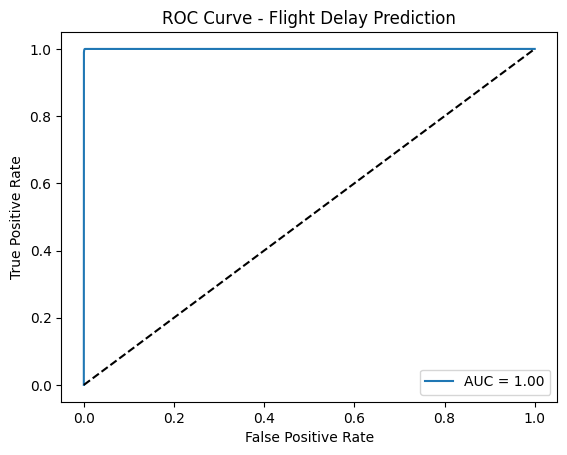

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv(r"D:\flight delay\archive (1)\flights_sample_2m.csv")

# =========================
# 2. Handle Missing Values
# =========================
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# =========================
# 3. Encode Categorical Features
# =========================
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# =========================
# 4. Create Target Variable
# =========================
df['DELAYED'] = (df['ARR_DELAY'] > 15).astype(int)  # Delayed if ARR_DELAY > 15 min
df.drop(columns=['ARR_DELAY'], inplace=True)

X = df.drop(columns=['DELAYED'])
y = df['DELAYED']

# =========================
# 5. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 6. Scale Numerical Features
# =========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================
# 7. Train Model
# =========================
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# =========================
# 8. Predictions & Evaluation
# =========================
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# =========================
# 9. ROC Curve
# =========================
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Flight Delay Prediction")
plt.legend()
plt.show()
